### Imports & Data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import math
import scipy
from scipy import stats
from scipy.stats import skew 
from scipy.stats import kurtosis 

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split

In [2]:
red_wine_no_out = pd.read_csv(r"C:\Users\janin\OneDrive\Desktop\Python exercise\Project 2\red_wine_no_out.csv", sep=',')

### Anova

### Skewness & Kurtosis


In [3]:
red_wine_no_out.skew()

fixed_acidity           0.868922
volatile_acidity        0.247503
citric_acid             0.322200
residual_sugar          1.378345
chlorides               0.158740
free_sulfur_dioxide     0.781377
total_sulfur_dioxide    1.211594
density                -0.106028
pH                      0.054962
sulphates               0.651613
alcohol                 0.864020
quality                 0.418557
quality_label           0.026744
type                    0.000000
dtype: float64

In [4]:
red_wine_no_out.kurt()

fixed_acidity           0.538548
volatile_acidity       -0.326829
citric_acid            -0.829004
residual_sugar          7.425378
chlorides               0.313187
free_sulfur_dioxide    -0.101528
total_sulfur_dioxide    1.159763
density                 0.140834
pH                     -0.170747
sulphates               0.153152
alcohol                 0.142479
quality                 0.203208
quality_label          -1.285550
type                    0.000000
dtype: float64

### Split Data


In [5]:
red_wine_no_out1 = red_wine_no_out.drop('quality', axis=1)

### Feature Scaling (left out)

Best parameters found by GridSearchCV: {'class_weight': 'balanced', 'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 20, 'n_estimators': 100}
              precision    recall  f1-score   support

           0       0.72      0.82      0.77       105
           1       0.78      0.72      0.75       121
           2       0.00      0.00      0.00         5

    accuracy                           0.75       231
   macro avg       0.50      0.51      0.51       231
weighted avg       0.74      0.75      0.74       231



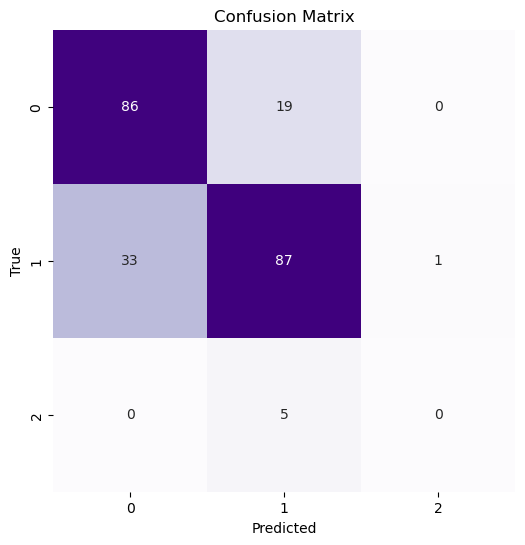

In [12]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming all_wine_cleaned3 is your dataset
# Split data into X and Y
X = red_wine_no_out1.drop('quality_label', axis=1)
y = red_wine_no_out1['quality_label']

# Split data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

# Define the parameter grid for hyperparameter tuning
param_grid = {
    'n_estimators': [100, 200, 500],           # Number of trees
    'max_depth': [10, 20, None],               # Maximum depth of trees
    'min_samples_split': [2, 10, 20],          # Minimum samples to split a node
    'min_samples_leaf': [1, 5, 10],            # Minimum samples at a leaf node
    'class_weight': ['balanced', {0: 1, 1: 1, 2: 5}]  # Class weights for balancing
}

# Initialize Random Forest Classifier
rf_clf = RandomForestClassifier(criterion='entropy', random_state=453)

# Set up GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(estimator=rf_clf, param_grid=param_grid, cv=5, scoring='f1_macro', n_jobs=-1)

# Fit the model with the original training data
grid_search.fit(x_train, y_train)

# Get the best model
best_rf = grid_search.best_estimator_
print(f"Best parameters found by GridSearchCV: {grid_search.best_params_}")

# Make predictions on the test data
preds = best_rf.predict(x_test)

# Print classification report
print(classification_report(y_test, preds))

# Confusion matrix
cm = confusion_matrix(y_test, preds)

# Plot confusion matrix using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Purples", cbar=False, square=True)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


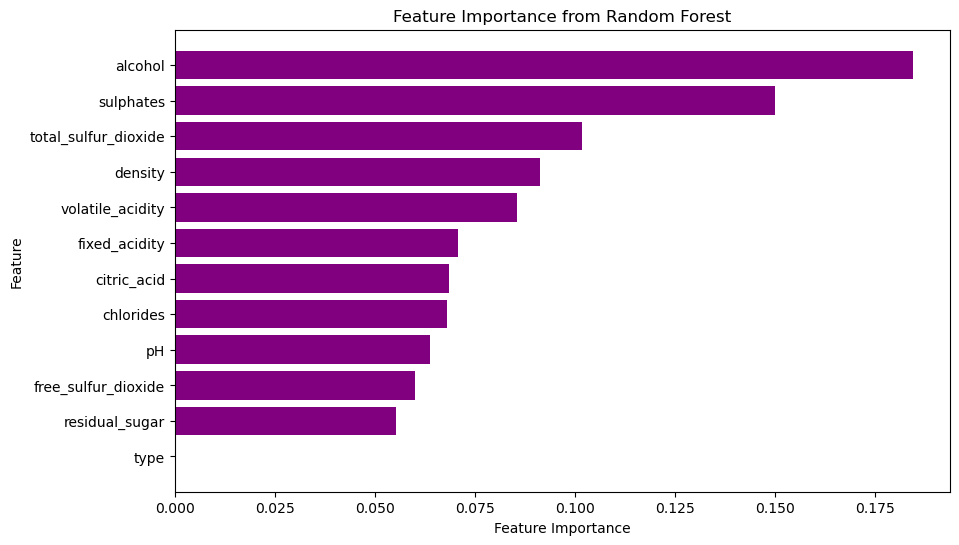

In [16]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

# Assuming all_wine_cleaned3 is your dataset
# Split data into X and Y
X = red_wine_no_out1.drop('quality_label', axis=1)
y = red_wine_no_out1['quality_label']

# Split data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

# Train Random Forest Classifier
rf_clf = RandomForestClassifier(n_estimators=100, criterion='entropy', random_state=453)
rf_clf.fit(x_train, y_train)

# Get feature importances
importances = rf_clf.feature_importances_

# Create a DataFrame for better visualization
feature_names = X.columns  # Get the feature names
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})

# Sort the DataFrame by importance
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Plot the feature importances as a bar plot
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='purple')
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Feature Importance from Random Forest')
plt.gca().invert_yaxis()  # Invert y-axis to show the most important feature at the top
plt.show()


c:\Users\janin\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
found 0 physical cores < 1
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "c:\Users\janin\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py", line 282, in _count_physical_cores
    raise ValueError(f"found {cpu_count_physical} physical cores < 1")


Best parameters found by GridSearchCV: {'class_weight': {0: 1, 1: 1, 2: 5}, 'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
              precision    recall  f1-score   support

           0       0.75      0.85      0.80       105
           1       0.81      0.73      0.77       121
           2       0.00      0.00      0.00         5

    accuracy                           0.77       231
   macro avg       0.52      0.52      0.52       231
weighted avg       0.77      0.77      0.76       231



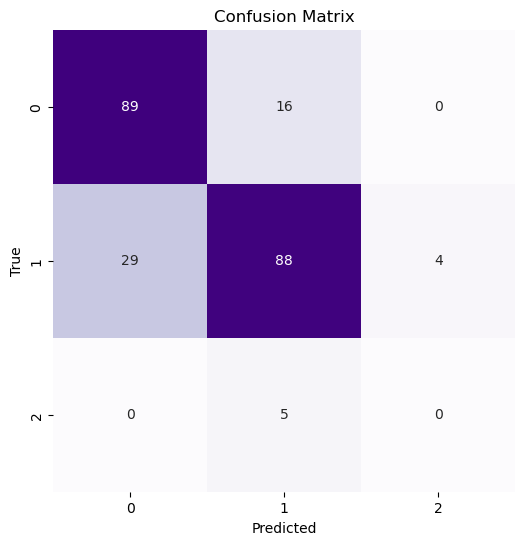

In [6]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming all_wine_cleaned3 is your dataset
# Split data into X and Y
X = red_wine_no_out.drop('quality_label', axis=1)
y = red_wine_no_out['quality_label']

# Split data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

# Apply SMOTE to oversample the minority class
smote = SMOTE(random_state=42)
x_train_resampled, y_train_resampled = smote.fit_resample(x_train, y_train)

# Z-score normalization
scaler = StandardScaler()

# Fit the scaler on the training data and transform both training and test data
x_train_scaled = scaler.fit_transform(x_train_resampled)
x_test_scaled = scaler.transform(x_test)

# Define the parameter grid for hyperparameter tuning
param_grid = {
    'n_estimators': [100, 200, 500],           # Number of trees
    'max_depth': [10, 20, None],               # Maximum depth of trees
    'min_samples_split': [2, 10, 20],          # Minimum samples to split a node
    'min_samples_leaf': [1, 5, 10],            # Minimum samples at a leaf node
    'class_weight': ['balanced', {0: 1, 1: 1, 2: 5}]  # Class weights for balancing
}

# Initialize Random Forest Classifier
rf_clf = RandomForestClassifier(criterion='entropy', random_state=453)

# Set up GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(estimator=rf_clf, param_grid=param_grid, cv=5, scoring='f1_macro', n_jobs=-1)

# Fit the model with the resampled training data
grid_search.fit(x_train_scaled, y_train_resampled)

# Get the best model
best_rf = grid_search.best_estimator_
print(f"Best parameters found by GridSearchCV: {grid_search.best_params_}")

# Make predictions on the test data
preds = best_rf.predict(x_test_scaled)

# Print classification report
print(classification_report(y_test, preds))

# Confusion matrix
cm = confusion_matrix(y_test, preds)

# Plot confusion matrix using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Purples", cbar=False, square=True)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


Best parameters found by GridSearchCV: {'class_weight': 'balanced', 'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 20, 'n_estimators': 100}
              precision    recall  f1-score   support

           0       0.72      0.82      0.77       105
           1       0.78      0.72      0.75       121
           2       0.00      0.00      0.00         5

    accuracy                           0.75       231
   macro avg       0.50      0.51      0.51       231
weighted avg       0.74      0.75      0.74       231

Accuracy: 0.7489


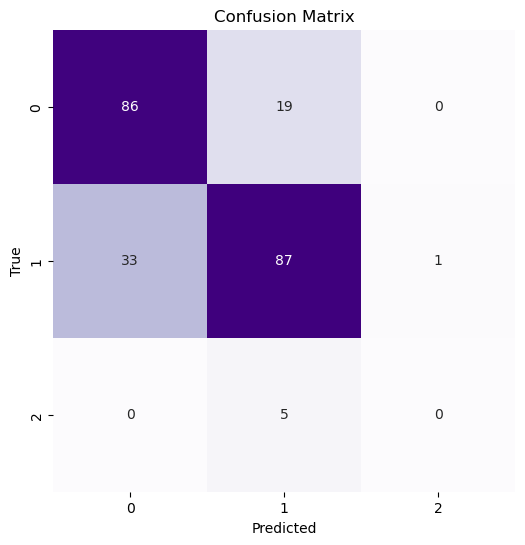

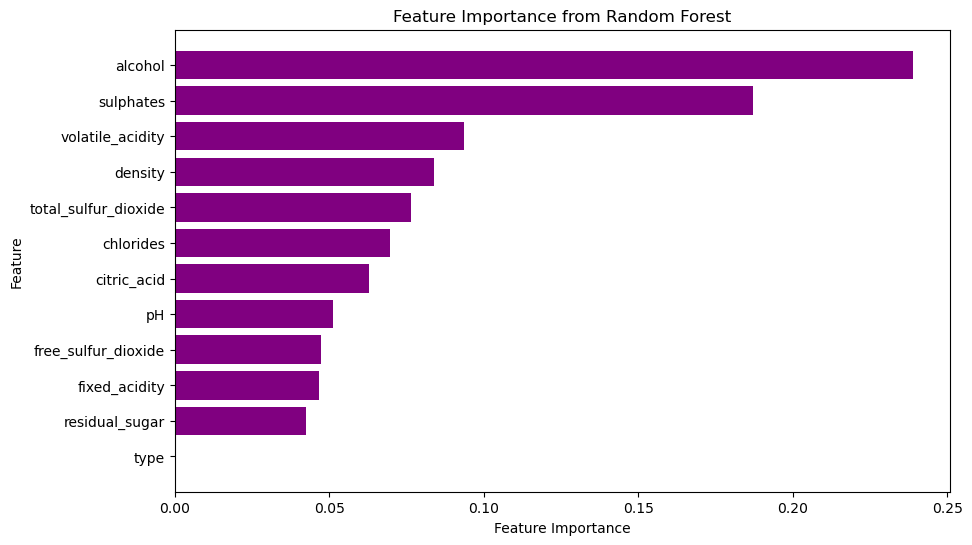

In [18]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

# Load your dataset (assuming you already have it in a pandas DataFrame)
# For this example, 'quality_label' is the target variable, and the other features are predictors.
# Replace 'all_wine_cleaned3.csv' with the correct file name or path.

# Example:
# all_wine_cleaned3 = pd.read_csv('path/to/your/dataset.csv')

# Let's assume `red_wine_no_out` is your cleaned dataset
# Split data into features (X) and target (y)
X = red_wine_no_out1.drop('quality_label', axis=1)
y = red_wine_no_out1['quality_label']

# Split into training and testing sets (80% train, 20% test)
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

# Define the parameter grid for hyperparameter tuning
param_grid = {
    'n_estimators': [100, 200, 500],           # Number of trees
    'max_depth': [10, 20, None],               # Maximum depth of trees
    'min_samples_split': [2, 10, 20],          # Minimum samples to split a node
    'min_samples_leaf': [1, 5, 10],            # Minimum samples at a leaf node
    'class_weight': ['balanced', {0: 1, 1: 1, 2: 15}]  # Class weights for balancing
}

# Initialize the Random Forest Classifier
rf_clf = RandomForestClassifier(criterion='entropy', random_state=453)

# Set up GridSearchCV for hyperparameter tuning (5-fold cross-validation)
grid_search = GridSearchCV(estimator=rf_clf, param_grid=param_grid, cv=5, scoring='f1_macro', n_jobs=-1)

# Fit the model to the training data
grid_search.fit(x_train, y_train)

# Get the best model
best_rf = grid_search.best_estimator_
print(f"Best parameters found by GridSearchCV: {grid_search.best_params_}")

# Make predictions on the test data
preds = best_rf.predict(x_test)

# Evaluate the model's performance
print(classification_report(y_test, preds))

# Print accuracy
accuracy = accuracy_score(y_test, preds)
print(f"Accuracy: {accuracy:.4f}")

# Confusion Matrix
cm = confusion_matrix(y_test, preds)

# Plot confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Purples", cbar=False, square=True)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# Feature importance plot
importances = best_rf.feature_importances_
feature_names = X.columns
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='purple')
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Feature Importance from Random Forest')
plt.gca().invert_yaxis()
plt.show()


### Prediction

In [7]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, accuracy_score # rmse root mean square error

# Random Forest Classifier model
RF_clf = RandomForestClassifier(n_estimators = 100, criterion = 'entropy', random_state=453)

# fit model
RF_clf.fit(x_train, y_train)

# predictions
preds = RF_clf.predict(x_test)

# accuracy
acc = accuracy_score(y_test, preds)
print(acc)

0.7792207792207793


In [8]:
from sklearn.metrics import classification_report
print (classification_report(y_test, preds))

              precision    recall  f1-score   support

           0       0.76      0.82      0.79       105
           1       0.80      0.78      0.79       121
           2       0.00      0.00      0.00         5

    accuracy                           0.78       231
   macro avg       0.52      0.53      0.53       231
weighted avg       0.76      0.78      0.77       231



c:\Users\janin\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\janin\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\janin\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [9]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, preds)

array([[86, 19,  0],
       [27, 94,  0],
       [ 0,  5,  0]], dtype=int64)

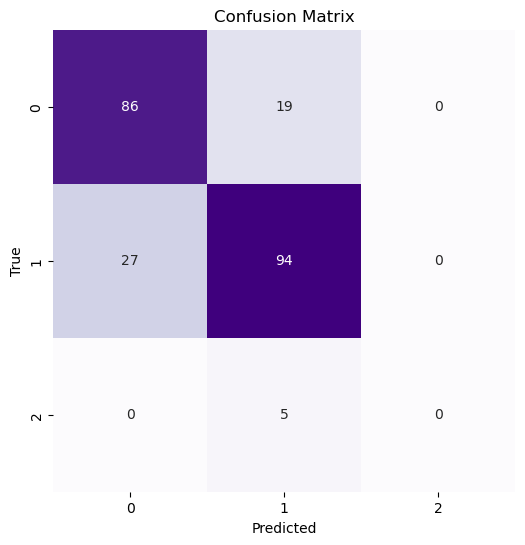

In [10]:
cm = confusion_matrix(y_test, preds)

# Plotting the confusion matrix using seaborn heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Purples", cbar=False, square=True)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()